<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/rvae_AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atrial Fibrillation classification with VAE

In [1]:
# Install the library

!pip install rapidae

In [1]:
import os
import sys

notebook_dir = os.path.abspath('') # get the current notebook directory
sys.path.append(os.path.join(notebook_dir, 'rapidae', 'src')) # add src folder to path to import modules
                                                        # '..', 'src' if you are in the 'examples' folder

In [3]:
import numpy as np
from rapidae.data import load_AtrialFibrillation
from rapidae.models import RVAE
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_latent_space

### Data

In this example, the selected dataset is composed of synthetic atrial fibrillation records.

In [4]:
data = load_AtrialFibrillation()

x_train, y_train = data["x_train"], data["y_train"]
x_val, y_val = data["x_val"], data["y_val"]
x_test, y_test = data["x_test"], data["y_test"]

# Obtain number of clasess
n_classes = len(np.unique(y_train))

2024-04-16 15:29:13 [INFO]: Downloading arrhythmia_data.npy...
2024-04-16 15:29:13 [INFO]: Deleting data...


### Model

In [9]:
timesteps = x_train.shape[1]
num_features = x_train.shape[2]

model = RVAE((timesteps, num_features))

2024-04-16 15:38:35 [INFO]: Trying to set encoder and decoder from child class...
2024-04-16 15:38:36 [INFO]: Encoder set from rvae.
2024-04-16 15:38:36 [INFO]: Decoder set from rvae.


### Training

In [10]:
epochs = 30
batch_size = 128

pipe = TrainingPipeline(name='RVAE_AtrialFibrillation', 
                        learning_rate=0.001,
                        model=model, 
                        num_epochs=epochs, 
                        batch_size=batch_size)

trained_model = pipe(x=x_train, y=y_train, x_val=x_val, y_val=y_val)

2024-04-16 15:38:39 [INFO]: +++ RVAE_AtrialFibrillation +++
2024-04-16 15:38:39 [INFO]: Creating folder in ./output_dir/RVAE_AtrialFibrillation_2024-04-16_15-38
2024-04-16 15:38:39 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: True
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/30

Epoch 1: val_loss improved from inf to 177.08502, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-04-16_15-38/model.weights.h5
315/315 - 23s - 73ms/step - clf_loss: 12.3500 - kl_loss: 7.1594 - loss: 313.3545 - reconstruction_loss: 293.8454 - val_clf_loss: 8.0198 - val_kl_loss: 6.8780 - val_loss: 177.0850 - val_reconstruction_loss: 162.1873
Epoch 2/30

Epoch 2: val_loss improved from 177.08502 to 163.14276, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-04-16_15-38/model.weights.h5
315/315 - 18s - 57ms/step - clf_loss: 6.6215 - kl_loss: 6.8077 - loss: 169.3681 - reconstruction_loss: 155.9390 - val_clf_loss: 5.9427 - val_kl_loss: 6.4170 - val_loss: 163.1428 - val_reconstruction_loss: 150.7831
Epoch 3/30

Epoch 3: val_loss improved from 163.14276 to 160.34760, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-04-16_15-38/model.weights.h5
315/315 - 18s - 57ms/step - clf_loss: 5.8846 - kl_loss: 6.6114 - loss: 166.4639 - reconstruction_loss: 153.9677 

2024-04-16 15:43:12 [INFO]: Restoring best model
2024-04-16 15:43:12 [INFO]: Best model restored


### Evaluation

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step


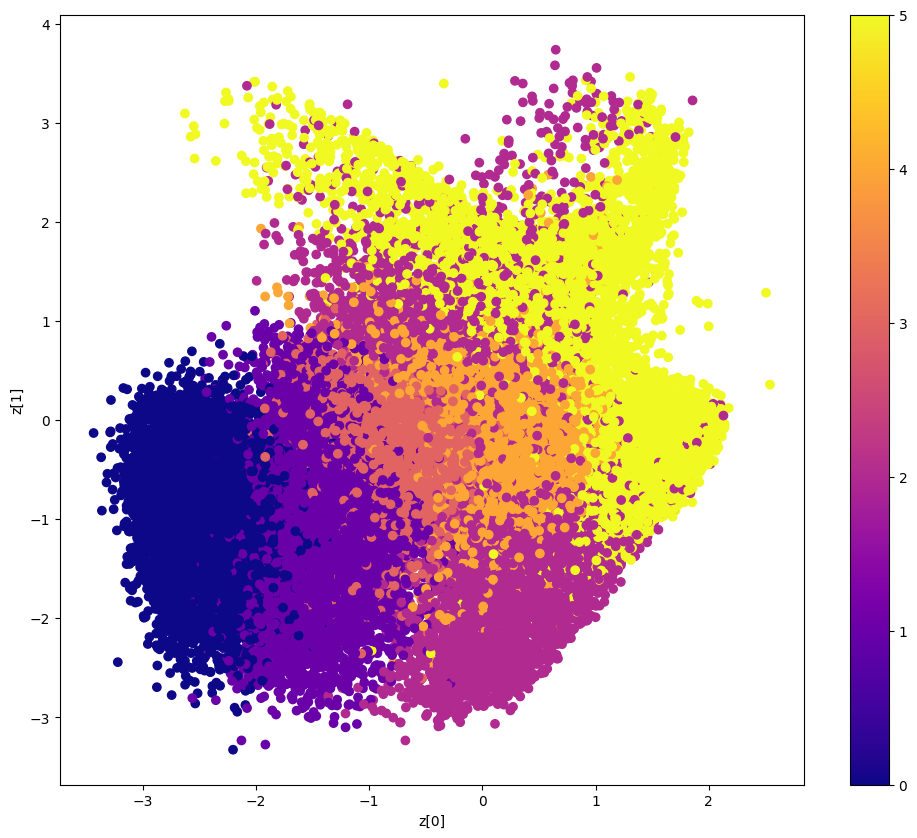

In [8]:
outputs = trained_model.predict(x_train)
plot_latent_space(outputs['z'], y_train)